In [1]:
import pandas as pd
import os

In [2]:
def merge_protein_csvs(folder_path):
    # Step 1: Get all CSVs
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Step 2: Identify the DAPI file (case-insensitive search)
    dapi_file = next((f for f in csv_files if 'dapi' in f.lower()), None)
    if not dapi_file:
        raise ValueError("No DAPI file found in folder.")

    # Step 3: Load DAPI DataFrame as base
    dapi_df = pd.read_csv(os.path.join(folder_path, dapi_file), skiprows=3)
    dapi_df.columns = [col.strip().rstrip(',').upper() for col in dapi_df.columns]
    dapi_df = dapi_df[['POSITION X', 'POSITION Y']].drop_duplicates()
    
    # Ensure we don't modify DAPI filename in the loop
    remaining_files = [f for f in csv_files if f != dapi_file]

    # Step 4: Process each protein file
    for file in remaining_files:
        filepath = os.path.join(folder_path, file)
        df = pd.read_csv(filepath, skiprows=3)
        df.columns = [col.strip().rstrip(',').upper() for col in df.columns]
        
        # Drop duplicates just in case
        df = df[['POSITION X', 'POSITION Y']].drop_duplicates()
        
        # Extract protein name and convert to uppercase
        protein_name = file.split('_')[0].upper()
        
        # Mark presence of (X,Y) in current protein file
        df[protein_name] = 1
        
        # Merge into base (DAPI) on POSITION X and Y
        dapi_df = dapi_df.merge(df, on=['POSITION X', 'POSITION Y'], how='left')
    
    # Step 5: Replace NaN with 0 in presence columns
    presence_cols = [col for col in dapi_df.columns if col not in ['POSITION X', 'POSITION Y']]
    dapi_df[presence_cols] = dapi_df[presence_cols].fillna(0).astype(int)

    return dapi_df

# Example usage:
folder_path = './data/'
test1 = merge_protein_csvs(folder_path)
test1


,POSITION X,POSITION Y,CD3,CD4,FOXP3,NK1.1
0,55878.777,41778.797,0,1,0,0
1,57359.824,40297.508,0,1,0,0
2,56290.895,41362.340,0,1,0,0
3,56432.293,41224.496,0,1,0,0
4,55830.648,41824.309,0,1,0,0
...,...,...,...,...,...,...
114264,53369.691,38341.012,0,1,0,0
114265,53274.793,38437.641,0,0,0,0
114266,53579.414,38130.742,0,1,0,0
114267,53456.289,38254.949,0,1,0,0


In [ ]:
# def row_labeler(row):
#     #start with checking for nk1.1. then cd3 then cd11b

#     # NK cells section, first check for NK1.1
#     if 'NK1.1'in row and row['NK1.1'] ==1:
#         if 'CD3' in row and row['CD3'] == 0:
#             if ('CD69' in row and row['CD69'] == 1) and ('GRANZYME' in row and row['GRANZYME'] == 1):
#                 return 'Cytotoxic Activated NK Cell' 

#             elif ('CD69' in row and row['CD69'] == 0 ) and ('GRANZYME' in row and row['GRANZYME'] == 1):
#                 return 'Cytotoxic NK Cell'  
            
#             elif ('CD69' in row and row['CD69'] == 1) and ('GRANZYME' in row and row['GRANZYME'] == 0):
#                 return 'Activated NK Cell'
            
#             return 'NK Cell'


#     # T cells section, first check for CD3
#     if 'CD3' in row and row['CD3'] == 1:
#         if 'NK1.1'in row and row['NK1.1'] ==1:
#             return 'NKT Cell'
#         if 'CD8'in row and row['CD8'] ==1:
#             return 'Cytotoxic T Cell'
#         if 'CD4' in row and row['CD4'] ==1:
#             if 'T-BET' in row and row['T-BET'] == 1:
#                 return 'Th1 Cell'
#             if 'FOXP3' in row and row['FOXP3'] == 1: #might need to check for CD25 too
#                 return 'Treg Cell'
    
#             return 'Helper T Cell'
    

#     return 'Other'

In [3]:
# # df['label'] = df.apply(assign_label, axis=1)

# from IPython.display import FileLink

# # test1['LABEL'] = test1.apply(row_labeler, axis=1)

# # Save CSV
# test1.to_csv('final_output.csv', index=False)

# # Display a download link in the notebook
# FileLink('final_output.csv')


In [4]:
# old non uppercase code
import pandas as pd
import os

def merge_protein_csvs(folder_path):
    # Step 1: Get all CSVs
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Step 2: Identify the DAPI file (case-insensitive search)
    dapi_file = next((f for f in csv_files if 'dapi' in f.lower()), None)
    if not dapi_file:
        raise ValueError("No DAPI file found in folder.")

    # Step 3: Load DAPI DataFrame as base
    dapi_df = pd.read_csv(os.path.join(folder_path, dapi_file), skiprows=3)
    dapi_df.columns = [col.strip().rstrip(',') for col in dapi_df.columns]
    dapi_df = dapi_df[['Position X', 'Position Y']].drop_duplicates()
    
    # Ensure we don't modify DAPI filename in the loop
    remaining_files = [f for f in csv_files if f != dapi_file]

    # Step 4: Process each protein file
    for file in remaining_files:
        filepath = os.path.join(folder_path, file)
        df = pd.read_csv(filepath, skiprows=3)
        df.columns = [col.strip().rstrip(',') for col in df.columns]
        
        # Drop duplicates just in case
        df = df[['Position X', 'Position Y']].drop_duplicates()
        
        # Extract protein name from filename
        protein_name = file.split('_')[0]
        
        # Mark presence of (X,Y) in current protein file
        df[protein_name] = 1
        
        # Merge into base (DAPI) on X and Y
        dapi_df = dapi_df.merge(df, on=['Position X', 'Position Y'], how='left')
    
    # Step 5: Replace NaN with 0 in presence columns
    presence_cols = [col for col in dapi_df.columns if col not in ['Position X', 'Position Y']]
    dapi_df[presence_cols] = dapi_df[presence_cols].fillna(0).astype(int)

    return dapi_df

folder_path = './data/'
test1 = merge_protein_csvs(folder_path)
test1

,Position X,Position Y,CD3,CD4,Foxp3,NK1.1
0,55878.777,41778.797,0,1,0,0
1,57359.824,40297.508,0,1,0,0
2,56290.895,41362.340,0,1,0,0
3,56432.293,41224.496,0,1,0,0
4,55830.648,41824.309,0,1,0,0
...,...,...,...,...,...,...
114264,53369.691,38341.012,0,1,0,0
114265,53274.793,38437.641,0,0,0,0
114266,53579.414,38130.742,0,1,0,0
114267,53456.289,38254.949,0,1,0,0


In [17]:
# # cell border experimental code: 

# import pandas as pd
# import numpy as np
# from scipy.spatial import ConvexHull

# # 1) Load your data
# df = test1      # columns “x” and “y”
# pts = df[['POSITION X', 'POSITION Y']].values             # shape (N,2) array

# # 2) Compute the convex hull
# hull = ConvexHull(pts)

# # hull.simplices is an (E,2) array of index pairs (i, j)
# # each representing an edge between pts[i] and pts[j].
# edges = hull.simplices

# # 3) Define a vectorized distance‐to‐segment function
# def point_to_segment_distances(points, seg_start, seg_end):
#     """
#     points: (N,2) array
#     seg_start, seg_end: each (2,) array
#     returns: (N,) array of distances from each point to the segment
#     """
#     v = seg_end - seg_start                      # (2,)
#     w = points - seg_start                       # (N,2)
#     # projection factor of each point onto the infinite line
#     t = np.einsum('ij,j->i', w, v) / np.dot(v, v)
#     # clamp to [0,1] so we “snap” to the segment
#     t_clamped = np.clip(t, 0.0, 1.0)             # (N,)
#     proj = seg_start + t_clamped[:,None] * v     # (N,2)
#     # euclidean distance from each point to its projection
#     return np.linalg.norm(points - proj, axis=1)

# # 4) Loop over edges, keep the minimum distance per point
# all_dists = np.full(len(pts), np.inf)
# for i, j in edges:
#     start, end = pts[i], pts[j]
#     d = point_to_segment_distances(pts, start, end)
#     all_dists = np.minimum(all_dists, d)

# # 5) Attach back to your DataFrame
# df['dist_to_hull'] = all_dists

# # 6) (Optional) Inspect
# df


In [16]:
cd3_position = pd.read_csv('edge_test/tumor edge test CD3 position_Selection.csv' , skiprows=3)
cd3_position.drop(columns=['Unit', 'Category',
       'Collection', 'Time', 'CC3 catchall', 'CC3 real', 'CD103',
       'CD103+ cDC1', 'CD3','CD177','CD3-CD68', 'CD3-CD68+CD206', 'CD4',
       'CD45',  'Unnamed: 18'], inplace=True)

cd3_distance = pd.read_csv('edge_test/tumor edge test_CD3 distance to tumor edge_Selection.csv' , skiprows=3)
cd3_distance.drop(columns=['Category', 'Surfaces', 'Time',
       'CC3 catchall', 'CC3 real', 'CD103', 'CD103+ cDC1', 'CD177', 'CD3',
       'CD3-CD68', 'CD3-CD68+CD206', 'Unit','CD4', 'CD45', 'Unnamed: 16'], inplace=True)

# cd3_position.head()
cd3_final = cd3_position.merge(cd3_distance, on=["ID"], how='left').sort_values(by=['ID'], ascending=True)
cd3_final =  cd3_final[['ID','Position X', 'Position Y', 'Position Z',
       'Shortest Distance to Surfaces']].set_index('ID')
cd3_final

,Position X,Position Y,Position Z,Shortest Distance to Surfaces
ID,,,,
0,87286.352,39678.461,2.373,256.589
21,87067.141,39897.441,2.333,205.241
70,87082.531,39892.945,2.081,209.912
292,87395.414,39635.039,4.682,180.723
622,87085.406,40034.551,6.220,69.469
...,...,...,...,...
58723,87405.586,37086.035,1.955,128.012
58724,87411.445,37113.520,1.206,156.499
58725,87410.750,37127.992,3.233,169.250


In [8]:
dapi2_position = pd.read_csv('edge_test/tumor edge test DAPI position_Selection.csv' , skiprows=3)
dapi2_position.drop(columns=['Unit', 'Category',
       'Collection', 'Time', 'CC3 catchall', 'CC3 real', 'CD103',
       'CD103+ cDC1', 'CD3','CD177','CD3-CD68', 'CD3-CD68+CD206', 'CD4',
       'CD45',  'Unnamed: 18'], inplace=True)

dapi2_distance = pd.read_csv('edge_test/tumor edge test_DAPI distance to tumor edge_Selection.csv' , skiprows=3)
dapi2_distance.drop(columns=['Category', 'Surfaces', 'Time',
       'CC3 catchall', 'CC3 real', 'CD103', 'CD103+ cDC1', 'CD177', 'CD3',
       'CD3-CD68', 'CD3-CD68+CD206', 'Unit','CD4', 'CD45', 'Unnamed: 16'], inplace=True)

# cd3_position.head()
dapi2_final = dapi2_position.merge(dapi2_distance, on=["ID"], how='left').sort_values(by=['ID'], ascending=True)
dapi2_final =  dapi2_final[['ID','Position X', 'Position Y', 'Position Z',
       'Shortest Distance to Surfaces']].set_index('ID')
dapi2_final.head()

/var/folders/bv/7wzy33ls6ln4ydwr6s8vwq8h0000gn/T/ipykernel_90988/740210039.py:1: DtypeWarning: Columns (8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  dapi2_position = pd.read_csv('edge_test/tumor edge test DAPI position_Selection.csv' , skiprows=3)


,Position X,Position Y,Position Z,Shortest Distance to Surfaces
ID,,,,
0,87286.352,39678.461,2.373,256.589
1,87253.484,39703.367,6.589,279.778
2,87024.227,39933.770,6.702,174.885
3,86896.992,40064.652,5.901,55.385
4,87015.500,39945.977,5.861,164.362


In [15]:
print(cd3_final.columns, dapi2_final.columns)

Index(['Position X', 'Position Y', 'Position Z',
       'Shortest Distance to Surfaces'],
      dtype='object') Index(['Position X', 'Position Y', 'Position Z',
       'Shortest Distance to Surfaces', 'dist_to_hull'],
      dtype='object')


In [11]:

# 1) Load your data
df =  dapi2_final# columns “x” and “y”
pts = df[['Position X', 'Position Y']].values             # shape (N,2) array

# 2) Compute the convex hull
hull = ConvexHull(pts)

# hull.simplices is an (E,2) array of index pairs (i, j)
# each representing an edge between pts[i] and pts[j].
edges = hull.simplices

# 3) Define a vectorized distance‐to‐segment function
def point_to_segment_distances(points, seg_start, seg_end):
    """
    points: (N,2) array
    seg_start, seg_end: each (2,) array
    returns: (N,) array of distances from each point to the segment
    """
    v = seg_end - seg_start                      # (2,)
    w = points - seg_start                       # (N,2)
    # projection factor of each point onto the infinite line
    t = np.einsum('ij,j->i', w, v) / np.dot(v, v)
    # clamp to [0,1] so we “snap” to the segment
    t_clamped = np.clip(t, 0.0, 1.0)             # (N,)
    proj = seg_start + t_clamped[:,None] * v     # (N,2)
    # euclidean distance from each point to its projection
    return np.linalg.norm(points - proj, axis=1)

# 4) Loop over edges, keep the minimum distance per point
all_dists = np.full(len(pts), np.inf)
for i, j in edges:
    start, end = pts[i], pts[j]
    d = point_to_segment_distances(pts, start, end)
    all_dists = np.minimum(all_dists, d)

# 5) Attach back to your DataFrame
df['dist_to_hull'] = all_dists

# 6) (Optional) Inspect
df


,Position X,Position Y,Position Z,Shortest Distance to Surfaces,dist_to_hull
ID,,,,,
0,87286.352,39678.461,2.373,256.589,344.303829
1,87253.484,39703.367,6.589,279.778,344.728350
2,87024.227,39933.770,6.702,174.885,227.469084
3,86896.992,40064.652,5.901,55.385,106.869526
4,87015.500,39945.977,5.861,164.362,216.583741
...,...,...,...,...,...
62183,87404.539,36997.043,2.713,40.845,83.511607
62184,87410.164,37034.875,0.963,78.880,121.603161
62185,87404.609,37051.000,5.010,93.720,137.361276


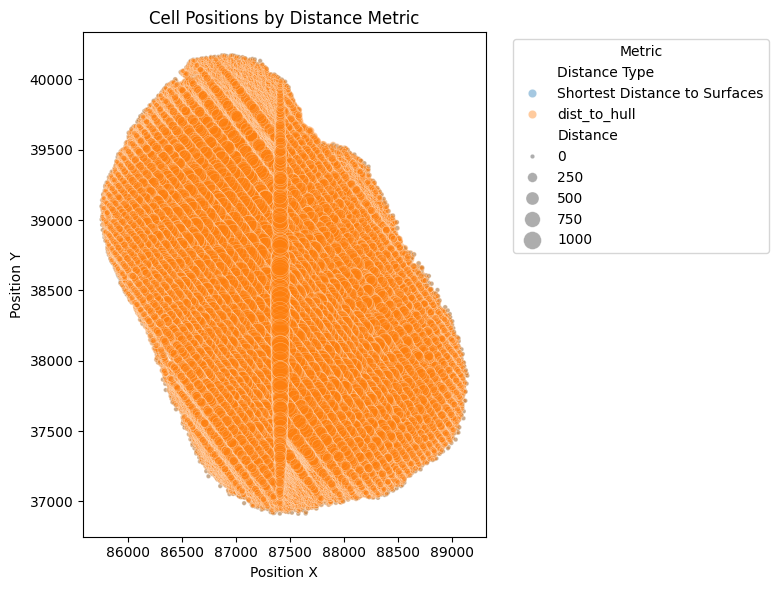

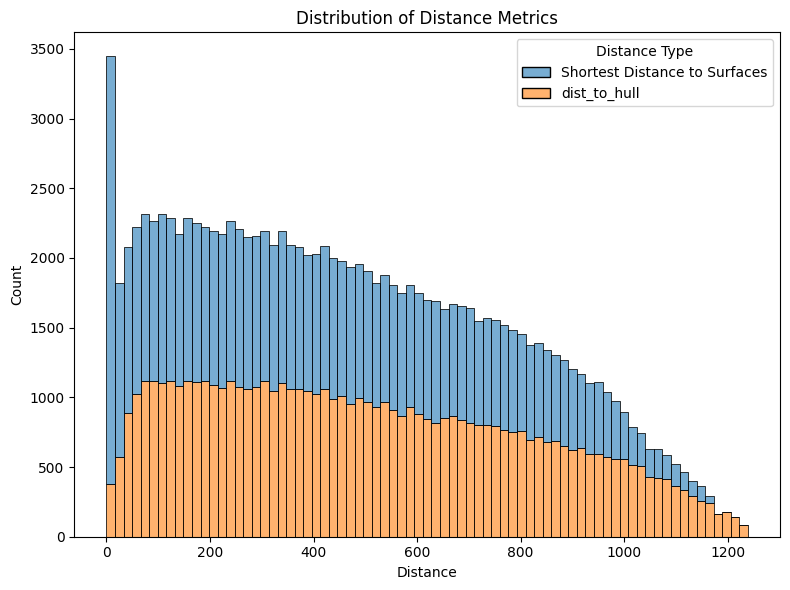

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is in `df`
# Melt to long form
df_long  = df
df_long = df.reset_index().melt(
    id_vars=['ID', 'Position X', 'Position Y'],
    value_vars=['Shortest Distance to Surfaces', 'dist_to_hull'],
    var_name='Distance Type',
    value_name='Distance'
)

# 1) Scatter with semi‑transparent points
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_long,
    x='Position X',
    y='Position Y',
    hue='Distance Type',
    size='Distance',
    sizes=(10, 200),
    alpha=0.4,             # more transparent
    legend='brief'
)
plt.title("Cell Positions by Distance Metric")
plt.xlabel("Position X")
plt.ylabel("Position Y")
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2) Stacked histogram of the two distance metrics
plt.figure(figsize=(8,6))
sns.histplot(
    data=df_long,
    x='Distance',
    hue='Distance Type',
    multiple='stack',      # stack the counts
    bins=75,
    alpha=0.6              # semi‑transparent bars
)
plt.title("Distribution of Distance Metrics")
plt.xlabel("Distance")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
# cell border experimental code: 

import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull

# 1) Load your data
df = test1      # columns “x” and “y”
pts = df[['POSITION X', 'POSITION Y']].values             # shape (N,2) array

# 2) Compute the convex hull
hull = ConvexHull(pts)

# hull.simplices is an (E,2) array of index pairs (i, j)
# each representing an edge between pts[i] and pts[j].
edges = hull.simplices

# 3) Define a vectorized distance‐to‐segment function
def point_to_segment_distances(points, seg_start, seg_end):
    """
    points: (N,2) array
    seg_start, seg_end: each (2,) array
    returns: (N,) array of distances from each point to the segment
    """
    v = seg_end - seg_start                      # (2,)
    w = points - seg_start                       # (N,2)
    # projection factor of each point onto the infinite line
    t = np.einsum('ij,j->i', w, v) / np.dot(v, v)
    # clamp to [0,1] so we “snap” to the segment
    t_clamped = np.clip(t, 0.0, 1.0)             # (N,)
    proj = seg_start + t_clamped[:,None] * v     # (N,2)
    # euclidean distance from each point to its projection
    return np.linalg.norm(points - proj, axis=1)

# 4) Loop over edges, keep the minimum distance per point
all_dists = np.full(len(pts), np.inf)
for i, j in edges:
    start, end = pts[i], pts[j]
    d = point_to_segment_distances(pts, start, end)
    all_dists = np.minimum(all_dists, d)

# 5) Attach back to your DataFrame
df['dist_to_hull'] = all_dists

# 6) (Optional) Inspect
df
